In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Loading Data Into Pandas DataFrames and Inspecting It

To load data into a Pandas Dataframe, you can use the `pandas.read_*` suite of functions. Common examples are.
- `pandas.read_csv()` to read from a comma separated values file
- `pandas.read_sql()` to read directly from a SQL database (either table by name or SQL query constructed as a string)
- `pandas.read_table()` to read from a more general delimited tabular file (could be comma, tab, space, `'|'`, or otherwise delimited)
- `pandas.read_json()` to read from a .json file, but pandas will expect the JSON data to have a particular structure

In [2]:
# example: loading the synthetic patients file simulated for the state of Massachusetts
patients_ma = pd.read_parquet('https://github.com/btwooton/arch_workshop_data_wrangling1_ws9/raw/refs/heads/main/data/output_ma_small/parquet/patients.parquet')

To inspect the data in a DataFrame visually, we can just write the name of our dataframe and evaluate it. Or if we want a shorter summary, we can use the `DataFrame.head()` method to only show the top n rows

In [4]:
# display the first 5 rows
patients_ma.head(5)

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,6d1ce69e-5cbc-e79b-ac66-91ee714f7e7d,2009-08-12,None,999-15-9006,None,None,None,Lenore883,Ciera654,Maggio310,...,Amherst,Massachusetts,Hampshire County,NaN,0,42.412510,-72.501086,47610.41,10999.82,27977
1,a1dfe7d5-400a-0ace-5097-0c3422b028d2,2000-12-21,None,999-62-8116,S99933991,X89748601X,Ms.,Kate239,Sherice231,Rutherford999,...,Duxbury,Massachusetts,Plymouth County,25023.0,2332,42.086337,-70.677321,81813.44,110314.81,53434
2,e30f89de-ce03-f009-6074-d886cc19ae00,1999-09-22,None,999-29-7212,S99926574,X32102367X,Ms.,Hoa730,Delcie812,Wehner319,...,South Hadley,Massachusetts,Hampshire County,NaN,0,42.232332,-72.608603,61278.10,42294.86,26420
3,65cde22c-a6c2-0a2a-1ee1-cebad9aa7d02,2023-08-15,None,999-44-6211,None,None,None,Roscoe437,Edison640,Fadel536,...,Worcester,Massachusetts,Worcester County,25027.0,1605,42.248759,-71.779911,5428.72,0.00,87004
4,4fc37b3a-3f21-63e3-f53b-c7ee03a95748,1987-12-02,None,999-19-6542,S99915546,X67961724X,Mr.,Jamaal34,Stephan15,Terry864,...,Lowell,Massachusetts,Middlesex County,25017.0,1851,42.617610,-71.324882,6139.95,60922.45,4497


We can also display the names of all columns/variables in the DataFrame, and their types, by accessing the `.columns` and `.dtypes` attributes

In [6]:
# display the columns in the DataFrame
patients_ma.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'MIDDLE', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE',
       'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE',
       'COUNTY', 'FIPS', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'INCOME'],
      dtype='object')

In [7]:
# display the columns and their datatypes
patients_ma.dtypes

Id                      object
BIRTHDATE               object
DEATHDATE               object
SSN                     object
DRIVERS                 object
PASSPORT                object
PREFIX                  object
FIRST                   object
MIDDLE                  object
LAST                    object
SUFFIX                  object
MAIDEN                  object
MARITAL                 object
RACE                    object
ETHNICITY               object
GENDER                  object
BIRTHPLACE              object
ADDRESS                 object
CITY                    object
STATE                   object
COUNTY                  object
FIPS                   float64
ZIP                      int64
LAT                    float64
LON                    float64
HEALTHCARE_EXPENSES    float64
HEALTHCARE_COVERAGE    float64
INCOME                   int64
dtype: object

We can also access the data in a particular column (or set of columns) by providing the column name(s) in square brackets
- When we access a single column, the type of object we get back is known as a Pandas `Series`. Think of this like a column of data
- When we access multiple columns of data using a list of names, such as `['Column1', 'Column2', 'Column3', ...]` we get back another `DataFrame`

In [8]:
# accessing the data in a particular column
patients_ma['FIRST']

0         Lenore883
1           Kate239
2            Hoa730
3         Roscoe437
4          Jamaal34
           ...     
290         Rory188
291         Aldo414
292    Zachariah133
293       Krista314
294        Heath320
Name: FIRST, Length: 295, dtype: object

In [12]:
type(patients_ma['FIRST'])

pandas.core.series.Series

In [9]:
# accessing the data in a set of columns
patients_ma[['FIRST', 'MIDDLE', 'LAST']]

,FIRST,MIDDLE,LAST
0,Lenore883,Ciera654,Maggio310
1,Kate239,Sherice231,Rutherford999
2,Hoa730,Delcie812,Wehner319
3,Roscoe437,Edison640,Fadel536
4,Jamaal34,Stephan15,Terry864
...,...,...,...
290,Rory188,Ginette140,Glover433
291,Aldo414,Jessie665,Denesik803
292,Zachariah133,Issac619,Boyle917
293,Krista314,Mana631,Cremin516


In [13]:
type(patients_ma[['FIRST', 'MIDDLE', 'LAST']])

pandas.core.frame.DataFrame

In [10]:
# columns can also be accesssed using the dot notation like with attributes
patients_ma.FIRST

0         Lenore883
1           Kate239
2            Hoa730
3         Roscoe437
4          Jamaal34
           ...     
290         Rory188
291         Aldo414
292    Zachariah133
293       Krista314
294        Heath320
Name: FIRST, Length: 295, dtype: object

## Basic Data Manipulation with DataFrames

### Counting

Suppose we want to count the number of patients by GENDER in our dataset
We can do so in two different ways
1. We can use the `Series.value_counts()` to count the distinct values in a given column/`Series`
2. We can use the `DataFrame.groupby()` method to group rows by a particular column (or set of columns) and then apply different aggregations

In [11]:
# count the number of male and female patients
patients_ma['GENDER'].value_counts()

GENDER
F    150
M    145
Name: count, dtype: int64

In [ ]:
# alternative approach using the groupby method, which takes in a column name, and then we apply an aggregate function
patients_ma.groupby('GENDER').size()

GENDER
F    150
M    145
dtype: int64

### Cross tabulations/Contingency Tables

Suppose now that we want to count the number of patients by both `GENDER` and `RACE`. We can do so in two different ways
1. Using the `pandas.crosstab()` method, which takes in two different columns/`Series` to be cross-tabulated
2. Using the `DataFrame.pivot_table()` method, which takes in the column names as either `index=` or `columns=` arguments, and an aggregate function

`pandas.crosstab()` is arguably the cleaner/nicer interface, since it automatically fills NAs and converts to integers

In [18]:
# count patients by gender and race
pd.crosstab(patients_ma['GENDER'], patients_ma['RACE'])

RACE,asian,black,hawaiian,native,other,white
GENDER,,,,,,
F,6,7,2,0,3,132
M,7,6,1,1,2,128


In [19]:
# alternative method using df.pivot_table(), but need to provide an aggregate function
patients_ma.pivot_table(index='GENDER', columns='RACE', aggfunc='size')

RACE,asian,black,hawaiian,native,other,white
GENDER,,,,,,
F,6.0,7.0,2.0,NaN,3.0,132.0
M,7.0,6.0,1.0,1.0,2.0,128.0


However, `DataFrame.pivot_table()` is more versatile, since we can also give the name of a column of values to be aggregated \
and we can do different kinds of aggregations (e.g., averaging, summing, min, max, etc.)

In [20]:
# computing the average healthcare expenses by gender and race
patients_ma.pivot_table(values='HEALTHCARE_EXPENSES', index='GENDER', columns='RACE', aggfunc='mean')

RACE,asian,black,hawaiian,native,other,white
GENDER,,,,,,
F,278290.256667,222962.107143,14915.175,NaN,216123.796667,257303.591894
M,203339.717143,63462.058333,75407.030,42724.32,161994.655000,134976.254922


In [22]:
# computing the total healthcare expenses by gender and race
patients_ma.pivot_table(values='HEALTHCARE_EXPENSES', index='GENDER', columns='RACE', aggfunc='sum')

RACE,asian,black,hawaiian,native,other,white
GENDER,,,,,,
F,1669741.54,1560734.75,29830.35,NaN,648371.39,33964074.13
M,1423378.02,380772.35,75407.03,42724.32,323989.31,17276960.63


### Descriptive Statistics
If we want to compoute descriptive statistics for particular variables/columns, there are a variety of built-in methods on `Series` as well as built in to the NumPy package

In [23]:
# compute the average healthcare expenses
patients_ma['HEALTHCARE_EXPENSES'].mean()

np.float64(194562.65701694912)

In [24]:
# accessing a larger suite of descriptive statistics
patients_ma['HEALTHCARE_EXPENSES'].describe()

count    2.950000e+02
mean     1.945627e+05
std      2.662997e+05
min      1.000000e+02
25%      2.312591e+04
50%      8.319767e+04
75%      2.388452e+05
max      1.380812e+06
Name: HEALTHCARE_EXPENSES, dtype: float64

### Descriptive Statistics with Numpy

In [25]:
# compute the average healthcare expenses
np.mean(patients_ma['HEALTHCARE_EXPENSES'])

np.float64(194562.65701694912)

In [26]:
# compute the standard deviation of healthcare expenses
np.std(patients_ma['HEALTHCARE_EXPENSES'])

np.float64(265847.9480647119)

In [27]:
# we can also call methods directly on columns/pandas series
patients_ma['HEALTHCARE_EXPENSES'].std()

np.float64(266299.68662002956)

Quick Question: Why did Numpy's std() give a different (smaller) value for the standard deviation than Pandas?

### Filtering DataFrames
If we want to extract data for specific subsets of records based on the values assigned to certain variables, we can use logical indexing
- If we want to extract all records with a certain value in a column, we can write `df[df['column_name'] == value]`
- We can use typical boolean operators for filtering such as `>`, `<`, `>=`, `<=`, etc.
If we want to chain logical filters we use the bitwise operators:
- `&` for logical `AND`
- `|` for logical `OR`
We need to be careful about order of operations here, since `|` and `&` have higher precedence than `==`, `<`, etc. in Python


In [28]:
# Selecting only patients who are female
females = patients_ma[patients_ma['GENDER'] == 'F'] # or patients_ma.query('GENDER == "F"')

In [29]:
females

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,6d1ce69e-5cbc-e79b-ac66-91ee714f7e7d,2009-08-12,None,999-15-9006,None,None,None,Lenore883,Ciera654,Maggio310,...,Amherst,Massachusetts,Hampshire County,NaN,0,42.412510,-72.501086,47610.41,10999.82,27977
1,a1dfe7d5-400a-0ace-5097-0c3422b028d2,2000-12-21,None,999-62-8116,S99933991,X89748601X,Ms.,Kate239,Sherice231,Rutherford999,...,Duxbury,Massachusetts,Plymouth County,25023.0,2332,42.086337,-70.677321,81813.44,110314.81,53434
2,e30f89de-ce03-f009-6074-d886cc19ae00,1999-09-22,None,999-29-7212,S99926574,X32102367X,Ms.,Hoa730,Delcie812,Wehner319,...,South Hadley,Massachusetts,Hampshire County,NaN,0,42.232332,-72.608603,61278.10,42294.86,26420
5,61f99cfd-bfca-4148-6ab4-dc751289b2b6,1979-12-01,None,999-31-6007,S99953993,X11808712X,Mrs.,Marta91,Cristin88,Ortiz186,...,Blackstone,Massachusetts,Worcester County,NaN,0,42.080856,-71.579102,223557.94,1509.58,82399
6,f41030ac-7d6e-e5f9-2418-627185939f9e,1990-03-26,None,999-51-4882,S99965440,X24214112X,Mrs.,Jocelyn538,Alfredia958,Goodwin327,...,Taunton,Massachusetts,Bristol County,25005.0,2718,41.903449,-70.971669,761142.45,153953.65,76209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,ac92db38-63df-aea1-be63-9f0bc4ca134a,1920-05-26,2024-07-16,999-27-7428,S99964516,X24243712X,Mrs.,Laurinda852,None,Fisher429,...,Waltham,Massachusetts,Middlesex County,25017.0,2452,42.356129,-71.209034,164933.88,3534783.02,8847
287,d67a14df-b014-3ee0-688c-b2d6573b47f5,1914-09-23,None,999-89-8033,S99941489,X10835948X,Mrs.,Dan465,None,Grimes165,...,Monument Beach,Massachusetts,Barnstable County,25001.0,2553,41.722623,-70.611573,381273.52,1722975.30,124439
288,8a9407c4-8f43-d63a-cce1-bb76f4709ce2,1920-05-26,2000-07-09,999-83-6829,S99997337,X49788746X,Ms.,Doreen575,Margareta320,Goodwin327,...,Waltham,Massachusetts,Middlesex County,25017.0,2452,42.349311,-71.219470,20754.03,955177.60,8847
290,863b94a2-c19c-826d-910e-b3bcfd4a2218,1920-05-26,2007-05-29,999-24-9040,S99922629,X61344760X,Mrs.,Rory188,Ginette140,Glover433,...,Waltham,Massachusetts,Middlesex County,25017.0,2452,42.383107,-71.258721,44209.26,1943469.09,8847


In [30]:
# get patients born after 1990
patients_ma[patients_ma['BIRTHDATE'] >= '1990-01-01']

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,6d1ce69e-5cbc-e79b-ac66-91ee714f7e7d,2009-08-12,None,999-15-9006,None,None,None,Lenore883,Ciera654,Maggio310,...,Amherst,Massachusetts,Hampshire County,NaN,0,42.412510,-72.501086,47610.41,10999.82,27977
1,a1dfe7d5-400a-0ace-5097-0c3422b028d2,2000-12-21,None,999-62-8116,S99933991,X89748601X,Ms.,Kate239,Sherice231,Rutherford999,...,Duxbury,Massachusetts,Plymouth County,25023.0,2332,42.086337,-70.677321,81813.44,110314.81,53434
2,e30f89de-ce03-f009-6074-d886cc19ae00,1999-09-22,None,999-29-7212,S99926574,X32102367X,Ms.,Hoa730,Delcie812,Wehner319,...,South Hadley,Massachusetts,Hampshire County,NaN,0,42.232332,-72.608603,61278.10,42294.86,26420
3,65cde22c-a6c2-0a2a-1ee1-cebad9aa7d02,2023-08-15,None,999-44-6211,None,None,None,Roscoe437,Edison640,Fadel536,...,Worcester,Massachusetts,Worcester County,25027.0,1605,42.248759,-71.779911,5428.72,0.00,87004
6,f41030ac-7d6e-e5f9-2418-627185939f9e,1990-03-26,None,999-51-4882,S99965440,X24214112X,Mrs.,Jocelyn538,Alfredia958,Goodwin327,...,Taunton,Massachusetts,Bristol County,25005.0,2718,41.903449,-70.971669,761142.45,153953.65,76209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,3d33086e-0aa4-823c-d7b6-5971456bdece,2017-07-01,None,999-40-8792,None,None,None,Hosea56,Tanner110,Hauck852,...,Boston,Massachusetts,Suffolk County,25025.0,2163,42.323949,-71.115199,12110.09,2089.74,49840
261,5f2564ff-ae91-a56e-0420-fe2b8d701d87,2013-11-17,None,999-11-5826,None,None,None,Mabel261,Jo405,Bradtke547,...,Abington,Massachusetts,Plymouth County,25023.0,2351,42.083487,-70.934105,22057.84,0.00,41254
267,e953d937-95ed-5fba-669b-fbc36e24c56b,1999-06-09,None,999-82-3868,S99910815,X15465603X,Mr.,Edmund685,None,Collins926,...,Bridgewater,Massachusetts,Plymouth County,25023.0,2324,42.007359,-70.987891,70211.13,0.00,51459
272,1734e181-1956-a2ad-0677-7c3f549c43dc,1993-09-02,None,999-73-5745,S99975914,X53456026X,Mrs.,Madelene819,Trudie215,Fisher429,...,Eastham,Massachusetts,Barnstable County,NaN,0,41.840159,-69.955848,167961.69,262530.06,76990


In [33]:
# get patients who are female AND born after 1990
patients_ma[
    (patients_ma['BIRTHDATE'] >= '1990-01-01') &
    (patients_ma['GENDER'] == 'F')
]

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,6d1ce69e-5cbc-e79b-ac66-91ee714f7e7d,2009-08-12,None,999-15-9006,None,None,None,Lenore883,Ciera654,Maggio310,...,Amherst,Massachusetts,Hampshire County,NaN,0,42.412510,-72.501086,47610.41,10999.82,27977
1,a1dfe7d5-400a-0ace-5097-0c3422b028d2,2000-12-21,None,999-62-8116,S99933991,X89748601X,Ms.,Kate239,Sherice231,Rutherford999,...,Duxbury,Massachusetts,Plymouth County,25023.0,2332,42.086337,-70.677321,81813.44,110314.81,53434
2,e30f89de-ce03-f009-6074-d886cc19ae00,1999-09-22,None,999-29-7212,S99926574,X32102367X,Ms.,Hoa730,Delcie812,Wehner319,...,South Hadley,Massachusetts,Hampshire County,NaN,0,42.232332,-72.608603,61278.10,42294.86,26420
6,f41030ac-7d6e-e5f9-2418-627185939f9e,1990-03-26,None,999-51-4882,S99965440,X24214112X,Mrs.,Jocelyn538,Alfredia958,Goodwin327,...,Taunton,Massachusetts,Bristol County,25005.0,2718,41.903449,-70.971669,761142.45,153953.65,76209
11,a0efd435-9035-d327-4453-cea982948bc6,2022-04-12,None,999-20-5359,None,None,None,Mckenzie208,Rosana394,Renner328,...,New Bedford,Massachusetts,Bristol County,25005.0,2745,41.541743,-70.960164,400.00,6458.48,20724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,a1a89a1b-3949-6b01-75dd-558af90678d7,1996-03-10,None,999-80-2499,S99996105,X15178852X,Mrs.,Delaine470,None,Price929,...,Lincoln,Massachusetts,Middlesex County,NaN,0,42.392199,-71.335431,7871.36,310175.46,6942
256,b4b5d27b-a13b-e1e5-ede6-f0da0fcdf5cb,1990-07-09,None,999-22-3700,S99974488,X25614816X,Mrs.,Galina98,Isis628,Johnson679,...,Newton,Massachusetts,Middlesex County,25017.0,2466,42.324141,-71.130502,191565.35,635897.71,116949
261,5f2564ff-ae91-a56e-0420-fe2b8d701d87,2013-11-17,None,999-11-5826,None,None,None,Mabel261,Jo405,Bradtke547,...,Abington,Massachusetts,Plymouth County,25023.0,2351,42.083487,-70.934105,22057.84,0.00,41254
272,1734e181-1956-a2ad-0677-7c3f549c43dc,1993-09-02,None,999-73-5745,S99975914,X53456026X,Mrs.,Madelene819,Trudie215,Fisher429,...,Eastham,Massachusetts,Barnstable County,NaN,0,41.840159,-69.955848,167961.69,262530.06,76990


Pandas also supports a `DataFrame.query()` method that has a somewhat more succinct, if not slightly more confusing syntax for filtering purposees

In [36]:
# Same as the example above, but using the query method
patients_ma.query('BIRTHDATE >= "1990-01-01" and GENDER == "F"')

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,6d1ce69e-5cbc-e79b-ac66-91ee714f7e7d,2009-08-12,None,999-15-9006,None,None,None,Lenore883,Ciera654,Maggio310,...,Amherst,Massachusetts,Hampshire County,NaN,0,42.412510,-72.501086,47610.41,10999.82,27977
1,a1dfe7d5-400a-0ace-5097-0c3422b028d2,2000-12-21,None,999-62-8116,S99933991,X89748601X,Ms.,Kate239,Sherice231,Rutherford999,...,Duxbury,Massachusetts,Plymouth County,25023.0,2332,42.086337,-70.677321,81813.44,110314.81,53434
2,e30f89de-ce03-f009-6074-d886cc19ae00,1999-09-22,None,999-29-7212,S99926574,X32102367X,Ms.,Hoa730,Delcie812,Wehner319,...,South Hadley,Massachusetts,Hampshire County,NaN,0,42.232332,-72.608603,61278.10,42294.86,26420
6,f41030ac-7d6e-e5f9-2418-627185939f9e,1990-03-26,None,999-51-4882,S99965440,X24214112X,Mrs.,Jocelyn538,Alfredia958,Goodwin327,...,Taunton,Massachusetts,Bristol County,25005.0,2718,41.903449,-70.971669,761142.45,153953.65,76209
11,a0efd435-9035-d327-4453-cea982948bc6,2022-04-12,None,999-20-5359,None,None,None,Mckenzie208,Rosana394,Renner328,...,New Bedford,Massachusetts,Bristol County,25005.0,2745,41.541743,-70.960164,400.00,6458.48,20724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,a1a89a1b-3949-6b01-75dd-558af90678d7,1996-03-10,None,999-80-2499,S99996105,X15178852X,Mrs.,Delaine470,None,Price929,...,Lincoln,Massachusetts,Middlesex County,NaN,0,42.392199,-71.335431,7871.36,310175.46,6942
256,b4b5d27b-a13b-e1e5-ede6-f0da0fcdf5cb,1990-07-09,None,999-22-3700,S99974488,X25614816X,Mrs.,Galina98,Isis628,Johnson679,...,Newton,Massachusetts,Middlesex County,25017.0,2466,42.324141,-71.130502,191565.35,635897.71,116949
261,5f2564ff-ae91-a56e-0420-fe2b8d701d87,2013-11-17,None,999-11-5826,None,None,None,Mabel261,Jo405,Bradtke547,...,Abington,Massachusetts,Plymouth County,25023.0,2351,42.083487,-70.934105,22057.84,0.00,41254
272,1734e181-1956-a2ad-0677-7c3f549c43dc,1993-09-02,None,999-73-5745,S99975914,X53456026X,Mrs.,Madelene819,Trudie215,Fisher429,...,Eastham,Massachusetts,Barnstable County,NaN,0,41.840159,-69.955848,167961.69,262530.06,76990


### Sorting
We can also sort the records/rows in a dataframe by a particular column or set of columns using `DataFrame.sort_values()`
- This method takes in an optional keyword argument `ascending=True|False` which can be used for ascending/decreasing order of the sort

In [34]:
# get patients born after 1990, and sort by birthdate
patients_ma[patients_ma['BIRTHDATE'] >= '1990-01-01'].sort_values(by='BIRTHDATE')

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
6,f41030ac-7d6e-e5f9-2418-627185939f9e,1990-03-26,None,999-51-4882,S99965440,X24214112X,Mrs.,Jocelyn538,Alfredia958,Goodwin327,...,Taunton,Massachusetts,Bristol County,25005.0,2718,41.903449,-70.971669,761142.45,153953.65,76209
75,730e950a-2dda-d68e-6eca-977ca6b7dca2,1990-04-08,None,999-31-1717,S99914325,X41617748X,Ms.,Velma961,Eliz744,Witting912,...,Ocean Grove,Massachusetts,Bristol County,NaN,0,41.735967,-71.160773,363975.92,0.00,114482
256,b4b5d27b-a13b-e1e5-ede6-f0da0fcdf5cb,1990-07-09,None,999-22-3700,S99974488,X25614816X,Mrs.,Galina98,Isis628,Johnson679,...,Newton,Massachusetts,Middlesex County,25017.0,2466,42.324141,-71.130502,191565.35,635897.71,116949
67,4f7592e3-5472-15b0-9d7c-52b2649de1cc,1990-12-27,None,999-60-2895,S99970833,X86929069X,Mrs.,Charisse42,Loreta61,Runolfsson901,...,Mansfield Center,Massachusetts,Bristol County,NaN,0,42.034752,-71.180921,277232.14,5356.82,97895
228,a462a279-5bf3-1a92-df8e-888151fbd5fe,1991-02-21,None,999-74-4571,S99931547,X65960846X,Mr.,Geoffrey157,Salvatore257,Skiles927,...,Dennis,Massachusetts,Barnstable County,25001.0,2638,41.679050,-70.134040,252431.73,133017.56,88379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,65cde22c-a6c2-0a2a-1ee1-cebad9aa7d02,2023-08-15,None,999-44-6211,None,None,None,Roscoe437,Edison640,Fadel536,...,Worcester,Massachusetts,Worcester County,25027.0,1605,42.248759,-71.779911,5428.72,0.00,87004
89,8d1fd1e6-12e1-6280-99ac-1784eb7ad9c2,2024-02-28,None,999-42-6050,None,None,None,Bob965,Hector463,Emard19,...,Lexington,Massachusetts,Middlesex County,25017.0,2421,42.452162,-71.207720,2422.91,3859.63,68529
9,7e3c2f7f-22c9-0327-9356-b83843da8d1b,2024-08-05,None,999-68-7317,None,None,None,Judson999,Kermit56,Larson43,...,Lawrence,Massachusetts,Essex County,25009.0,1840,42.663334,-71.117931,100.00,2369.48,21164
123,6fe9ac0c-5f8e-1238-446e-76892c2f3d99,2025-01-02,None,999-83-6489,None,None,None,Iola859,None,Willms744,...,Beverly,Massachusetts,Essex County,25009.0,1915,42.590574,-70.867904,100.00,520.18,5785


In [35]:
# do the same, but sort in decreasing order by birthdate
patients_ma.query('BIRTHDATE >= "1990-01-01"').sort_values(by='BIRTHDATE', ascending=False)

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
164,4190d09a-4f0f-07ce-0d4b-1b2e7ac65780,2025-01-17,None,999-98-6561,None,None,None,Rhett759,None,Stehr398,...,Raynham Center,Massachusetts,Bristol County,25005.0,2768,41.912645,-71.066893,620.18,0.00,42532
123,6fe9ac0c-5f8e-1238-446e-76892c2f3d99,2025-01-02,None,999-83-6489,None,None,None,Iola859,None,Willms744,...,Beverly,Massachusetts,Essex County,25009.0,1915,42.590574,-70.867904,100.00,520.18,5785
9,7e3c2f7f-22c9-0327-9356-b83843da8d1b,2024-08-05,None,999-68-7317,None,None,None,Judson999,Kermit56,Larson43,...,Lawrence,Massachusetts,Essex County,25009.0,1840,42.663334,-71.117931,100.00,2369.48,21164
89,8d1fd1e6-12e1-6280-99ac-1784eb7ad9c2,2024-02-28,None,999-42-6050,None,None,None,Bob965,Hector463,Emard19,...,Lexington,Massachusetts,Middlesex County,25017.0,2421,42.452162,-71.207720,2422.91,3859.63,68529
3,65cde22c-a6c2-0a2a-1ee1-cebad9aa7d02,2023-08-15,None,999-44-6211,None,None,None,Roscoe437,Edison640,Fadel536,...,Worcester,Massachusetts,Worcester County,25027.0,1605,42.248759,-71.779911,5428.72,0.00,87004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,a462a279-5bf3-1a92-df8e-888151fbd5fe,1991-02-21,None,999-74-4571,S99931547,X65960846X,Mr.,Geoffrey157,Salvatore257,Skiles927,...,Dennis,Massachusetts,Barnstable County,25001.0,2638,41.679050,-70.134040,252431.73,133017.56,88379
67,4f7592e3-5472-15b0-9d7c-52b2649de1cc,1990-12-27,None,999-60-2895,S99970833,X86929069X,Mrs.,Charisse42,Loreta61,Runolfsson901,...,Mansfield Center,Massachusetts,Bristol County,NaN,0,42.034752,-71.180921,277232.14,5356.82,97895
256,b4b5d27b-a13b-e1e5-ede6-f0da0fcdf5cb,1990-07-09,None,999-22-3700,S99974488,X25614816X,Mrs.,Galina98,Isis628,Johnson679,...,Newton,Massachusetts,Middlesex County,25017.0,2466,42.324141,-71.130502,191565.35,635897.71,116949
75,730e950a-2dda-d68e-6eca-977ca6b7dca2,1990-04-08,None,999-31-1717,S99914325,X41617748X,Ms.,Velma961,Eliz744,Witting912,...,Ocean Grove,Massachusetts,Bristol County,NaN,0,41.735967,-71.160773,363975.92,0.00,114482


### Assigning New Columns/Variables
If we want to assign a new column/variable to the dataframe, we can do this by either
- Writing `df[<column_name>] = <values>`, which changes/modifies the DataFrame in place
- Using the `DataFrame.assign()` method, which by default returns a copy of the original dataframe with the new column added
- `DataFrame.assign()` is quite a bit more flexible, easier to read, and easier to reason about (once you get comfortable with it), \
and it supports a higher order functional approach to specifying the values that get assigned 

In [37]:
# assign a full name column
patients_ma['FULLNAME'] = patients_ma['FIRST'] + ' ' + patients_ma['MIDDLE'] + ' ' + patients_ma['LAST']

In [38]:
patients_ma['FULLNAME']

0          Lenore883 Ciera654 Maggio310
1      Kate239 Sherice231 Rutherford999
2            Hoa730 Delcie812 Wehner319
3          Roscoe437 Edison640 Fadel536
4           Jamaal34 Stephan15 Terry864
                     ...               
290        Rory188 Ginette140 Glover433
291        Aldo414 Jessie665 Denesik803
292      Zachariah133 Issac619 Boyle917
293         Krista314 Mana631 Cremin516
294     Heath320 Brendan864 Gorczany269
Name: FULLNAME, Length: 295, dtype: object

In [41]:
# same as above, but using the asssign() method
patients_ma.drop(columns=['FULLNAME'], inplace=True, errors='ignore') # drop the column if it exists
patients_ma.assign(
    FULLNAME=lambda x: x['FIRST'] + ' ' + x['MIDDLE'] + ' ' + x['LAST']
)[['FULLNAME', 'FIRST', 'MIDDLE', 'LAST']]

,FULLNAME,FIRST,MIDDLE,LAST
0,Lenore883 Ciera654 Maggio310,Lenore883,Ciera654,Maggio310
1,Kate239 Sherice231 Rutherford999,Kate239,Sherice231,Rutherford999
2,Hoa730 Delcie812 Wehner319,Hoa730,Delcie812,Wehner319
3,Roscoe437 Edison640 Fadel536,Roscoe437,Edison640,Fadel536
4,Jamaal34 Stephan15 Terry864,Jamaal34,Stephan15,Terry864
...,...,...,...,...
290,Rory188 Ginette140 Glover433,Rory188,Ginette140,Glover433
291,Aldo414 Jessie665 Denesik803,Aldo414,Jessie665,Denesik803
292,Zachariah133 Issac619 Boyle917,Zachariah133,Issac619,Boyle917
293,Krista314 Mana631 Cremin516,Krista314,Mana631,Cremin516


### Visualizing Distributions with Matplotlib and Pandas
The Matplotlib and Seaborn packages support a wide array of built-in chart types for creating figures/visualizations. \
Here we will just briefly look at some of the functionality. Pandas also has a number of built-in methods that can be \
called directly on `DataFrames` and `Series`, which use Matplotlib under the hood.

- Above, we imported the `pyplot` submodule from `matplotlib` with `from matplotlib import pyplot as plt`, so that we can just write `plt.<some_method>()` to use plotting functionality
- Similarly, we aliased `seaborn` as `import seaborn as sns`

<Axes: >

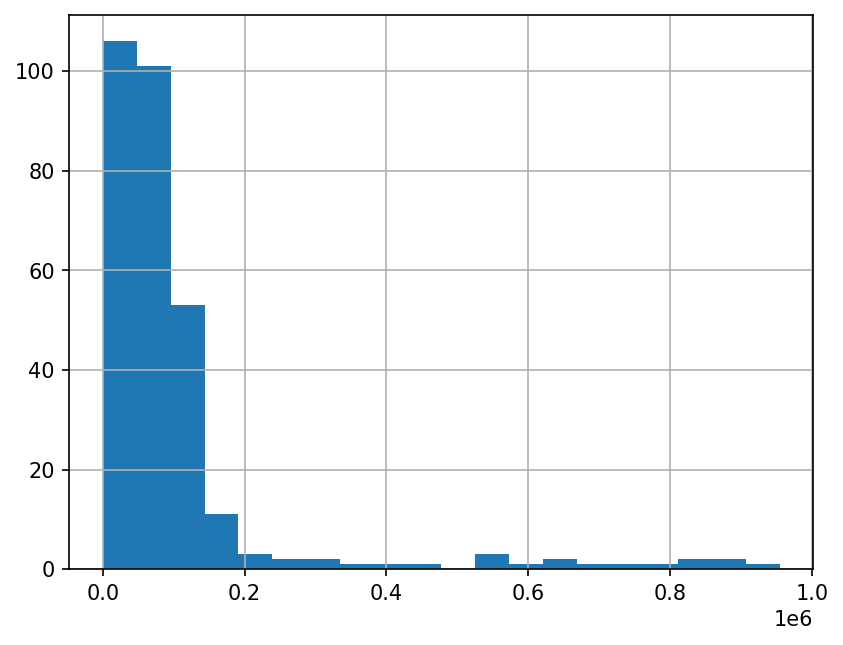

In [42]:
# Plotting the distribution of income as a histogram
fig, ax = plt.subplots(dpi=150)
patients_ma['INCOME'].hist(bins=20, ax=ax)

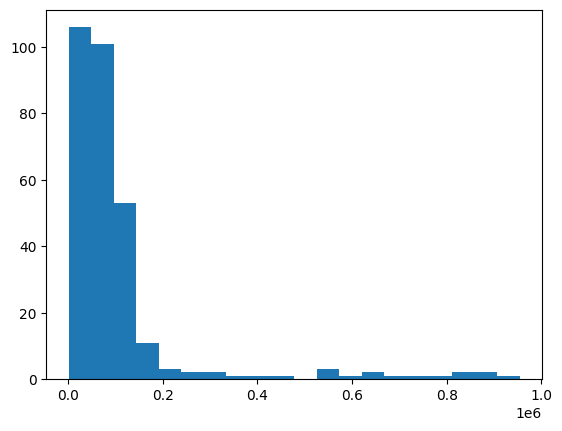

In [43]:
# alternative using matplotlib directly
plt.hist(patients_ma['INCOME'], bins=20)
plt.show()

### Grouped Histograms
When creating histograms with `DataFrame.hist()`, we can also generate grouped histograms by providing a column name in the `by=` keyword argument

array([<Axes: title={'center': 'F'}>, <Axes: title={'center': 'M'}>],
      dtype=object)

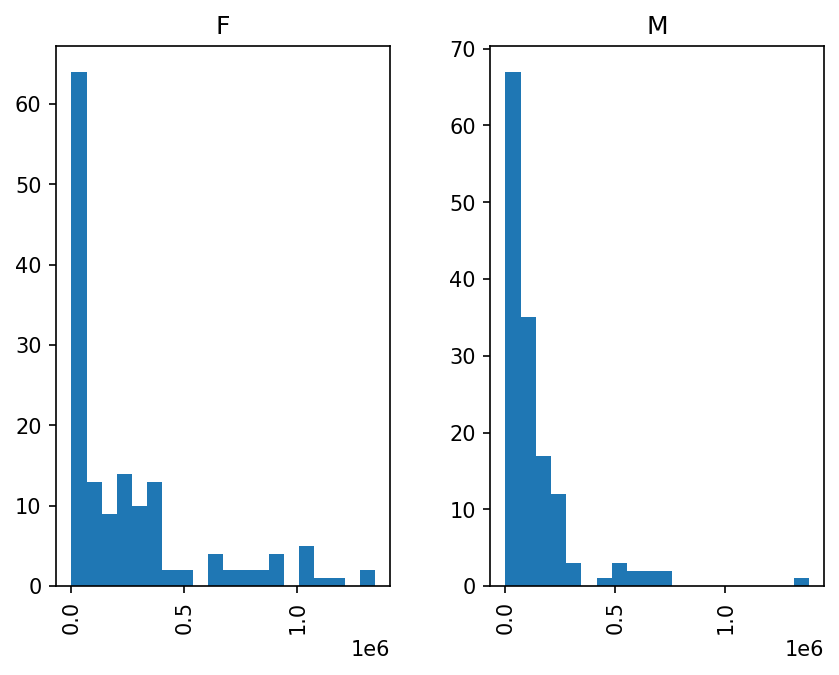

In [45]:
# plotting the distributions of healthcare expenses by gender
fig, ax = plt.subplots(1, 2, dpi=150)
patients_ma.hist('HEALTHCARE_EXPENSES', by='GENDER', bins=20, ax=ax)

### Box Plots and Violing Plots with Seaborn
The Seaborn package builds on top of Matplotlib with a nice set of customizable aesthetic defaults, and a somewhat extended suite of statistical charts compared to what is offered in vanilla Matplotlib

<Axes: xlabel='GENDER', ylabel='HEALTHCARE_EXPENSES'>

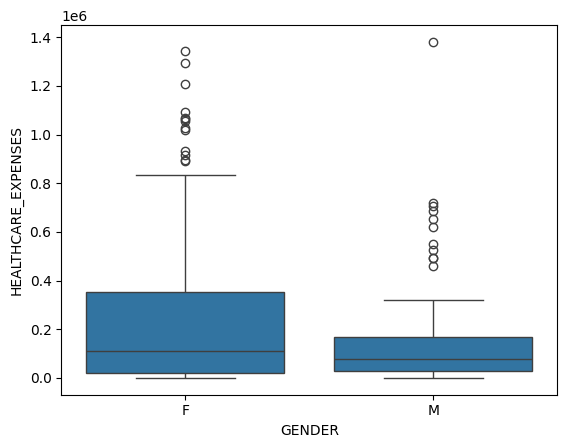

In [46]:
# Alternative approaches to visualizing distributions with seaborn
sns.boxplot(patients_ma, x='GENDER', y='HEALTHCARE_EXPENSES')

<Axes: xlabel='RACE', ylabel='HEALTHCARE_EXPENSES'>

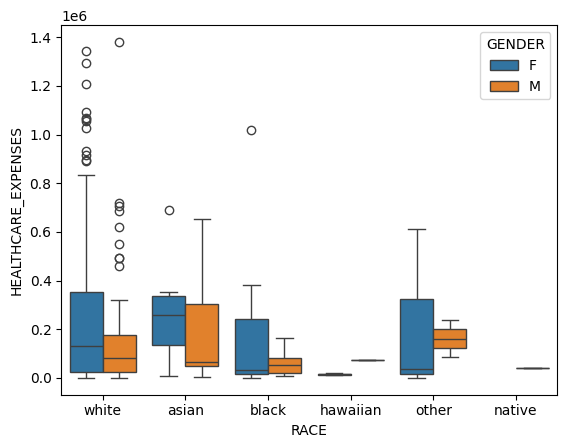

In [47]:
sns.boxplot(patients_ma, x='RACE', y='HEALTHCARE_EXPENSES', hue='GENDER')

<Axes: xlabel='GENDER', ylabel='HEALTHCARE_EXPENSES'>

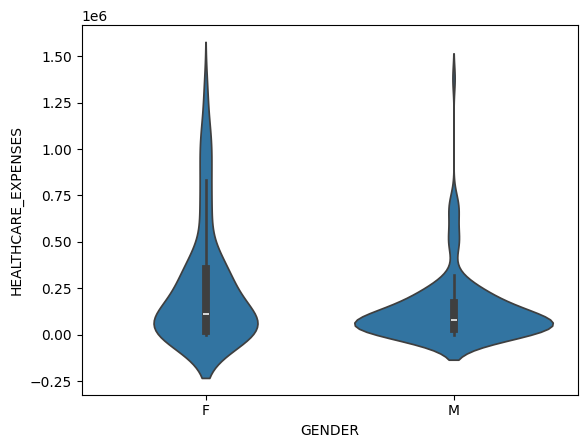

In [48]:
sns.violinplot(patients_ma, x='GENDER', y='HEALTHCARE_EXPENSES')

<Axes: xlabel='RACE', ylabel='HEALTHCARE_EXPENSES'>

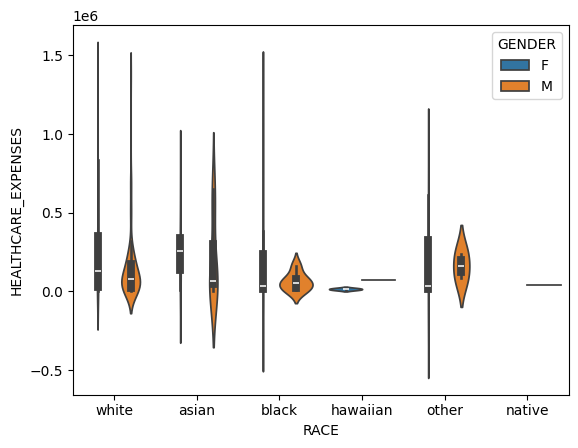

In [51]:
sns.violinplot(patients_ma, x='RACE', hue='GENDER', y='HEALTHCARE_EXPENSES')

## Quick Exercises

### 1. What is the median income of patients born after January 1st 1995

In [ ]:
# Write and run your solution here

### 2. Count the number of patients in each COUNTY

In [ ]:
# Write and run your solution here

### 3. What is the mean age (in years) of all patients?
<details>
    <summary>Hint 1</summary>
    <h4>You can convert BIRTHDATE to the datetime data type using <code>pd.to_datetime()</code></h4>
</details>
<details>
    <summary>Hint 2</summary>
    <h4>You can get today's date with <code>pd.to_datetime("today")</code></h4>
</details>
<details>
    <summary>Hint 3</summary>
    <h4>You can use the <code>.dt.days</code> method on a datetime column/series or datetime value to get the value of the date(s) expressed in days</h4>
</details>


In [ ]:
# Write and run your solution here

### 4. Count the number of patients of each RACE who are over 60
<details>
    <summary>Hint</summary>
    <h4>If you didn't save the AGE that we computed in the last exercise to a column/variable, do that first</h4>
</details>

In [ ]:
# Write and run your solution here

### 5. Generate a grouped histogram of income distributions by 10 year AGE cohorts


In [ ]:
# create an AGE_BIN column
patients_ma['AGE_BIN'] = pd.cut(patients_ma['AGE'], np.arange(0, 120, 10), include_lowest=True)

fig, ax = plt.subplots(3, 4, dpi=150, figsize=(8, 6))

# Flatten the axes array
ax = ax.flatten()

# Count the number of unique AGE_BINs
num_groups = patients_ma['AGE_BIN'].nunique()

# insert your plotting code here, passing in ax=ax[:num_groups] as a keyword argument to the correct plot function

### 6. Plot INCOME vs AGE for all patients
<details>
    <summary>Hint</summary>
    <p>The pandas documentation for <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html">DataFrame.plot.scatter</a> might prove useful</p>
</details>

In [ ]:
# Write and run your solution here